In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import firwin


In [5]:
def convolve(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1

    y = [0] * len_y

    for n in range(len_y):
        for k in range(len_x):
            if (n-k >= 0 and n-k < len_h):
                y[n] += x[k] * h[n-k]
    return y

[-3.59166134e-03 -4.06439778e-03  2.04923871e-18  2.12506970e-02
  6.72915323e-02  1.29920204e-01  1.85381764e-01  2.07623724e-01
  1.85381764e-01  1.29920204e-01  6.72915323e-02  2.12506970e-02
  2.04923871e-18 -4.06439778e-03 -3.59166134e-03]


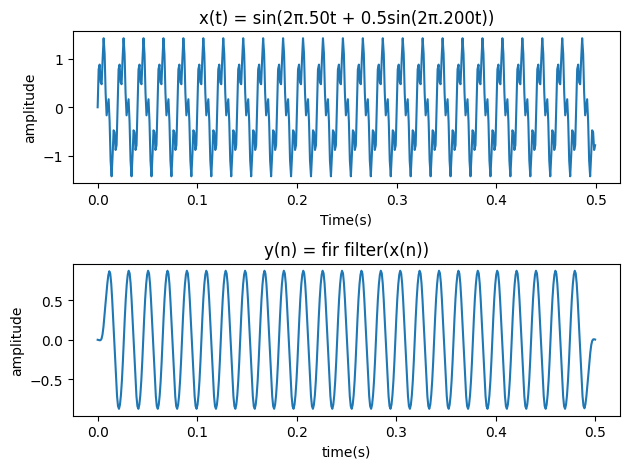

In [ ]:
fs = 1000
cutoff_freq = 100

# number of filter coefficients
num_taps = 15

# list of coefficients
fir_coefficients = firwin(num_taps, cutoff_freq, fs = fs, window="hamming")
# print(fir_coefficients)

t = np.arange(0, 1.0, 1/fs)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

t = t[t < 0.5]
x = x[:len(t)]

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel("Time(s)")
plt.ylabel('amplitude')
plt.title('x(t) = sin(2π.50t + 0.5sin(2π.200t))')

y = convolve(fir_coefficients, x)
t = np.linspace(0, 0.5, len(y))

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.title('y(n) = fir filter(x(n))')

plt.tight_layout()
plt.show()